<a href="https://colab.research.google.com/github/Aandhikads/Aandhikads/blob/main/Vehicle_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Albertus Andhika D.S.B.B
20.0504.0037
Teknik Informatika 5B


Link Datasets :https://www.kaggle.com/datasets/maciejgronczynski/vehicle-classification-dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pathdata = '/content/drive/MyDrive/dataset'

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [6]:
train_gen = train_datagen.flow_from_directory(
    pathdata, 
    subset='training',
    target_size=(180, 120),
    batch_size=10,
    shuffle=True,
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    pathdata,
    subset='validation',
    target_size=(180, 120),
    batch_size=10,
    shuffle=True,
    class_mode='categorical'
)

Found 720 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


In [7]:
model =tf.keras.models.Sequential([
tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(180, 120 , 3)),
tf.keras.layers.MaxPooling2D((3,3)),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((3,3)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((3,3)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(150, activation='relu'),
tf.keras.layers.Dense(60, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 118, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 39, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 37, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 10, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 3, 32)         0

In [9]:
from tensorflow.keras.optimizers import Adadelta
model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(lr=1),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adadelta.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [10]:
callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=16, mode='max')

In [11]:
history=model.fit(
      train_gen ,
      steps_per_epoch=64,  
      epochs=20,
      validation_data=val_gen, 
      validation_steps=64,  
      verbose=2,
      callbacks=callbacks)

Epoch 1/20


64/64 - 184s - loss: 1.0972 - accuracy: 0.3594 - val_loss: 1.0534 - val_accuracy: 0.5021 - 184s/epoch - 3s/step
Epoch 2/20
64/64 - 25s - loss: 1.0432 - accuracy: 0.4703 - 25s/epoch - 390ms/step
Epoch 3/20
64/64 - 17s - loss: 0.9582 - accuracy: 0.5250 - 17s/epoch - 270ms/step
Epoch 4/20
64/64 - 17s - loss: 0.9065 - accuracy: 0.5562 - 17s/epoch - 260ms/step
Epoch 5/20
64/64 - 17s - loss: 0.8526 - accuracy: 0.6234 - 17s/epoch - 261ms/step
Epoch 6/20
64/64 - 16s - loss: 0.8051 - accuracy: 0.6547 - 16s/epoch - 254ms/step
Epoch 7/20
64/64 - 16s - loss: 0.7662 - accuracy: 0.6562 - 16s/epoch - 257ms/step
Epoch 8/20
64/64 - 16s - loss: 0.7538 - accuracy: 0.6734 - 16s/epoch - 256ms/step
Epoch 9/20
64/64 - 16s - loss: 0.7387 - accuracy: 0.6703 - 16s/epoch - 256ms/step
Epoch 10/20
64/64 - 17s - loss: 0.7059 - accuracy: 0.7203 - 17s/epoch - 264ms/step
Epoch 11/20
64/64 - 16s - loss: 0.6765 - accuracy: 0.7016 - 16s/epoch - 248ms/step
Epoch 12/20
64/64 - 18s - loss: 0.6025 - accuracy: 0.7516 - 18s/ep

Saving train1.jpg to train1.jpg
1/1 [==============================] - 0s 27ms/step
train1.jpg
train


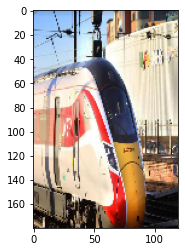

In [21]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(180,120))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  prediksi = model.predict(images, batch_size=10)
  label = np.argmax(prediksi)  
  print(fn)
  if label== 0:
    print('cars')
  elif label==1:
    print('planes')
  else:
    print('train')